# Word Cloud

### Imports

In [1]:
# Imports
import pandas as pd

# SpaCy Imports
import spacy as sp
nlp = sp.load("en_core_web_lg")

# Word Cloud Imports
from wordcloud import WordCloud
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [2]:
perc = str(round(((2000/38500)*100),2))+"%"
print("2,000 rows represents about",perc,"of the total rows in the dataframe.")

2,000 rows represents about 5.19% of the total rows in the dataframe.


### Define a Word Cloud Function

In [3]:
def word_cloud(CSV):
    
    # Make Sure CSV You Are Working with is in the Directory
    while True:
        the_CSV = str(input(prompt="Is the CSV in your working directory? Type'Y' for YES or 'N' for NO. "))
        if the_CSV in ['Y','y',"'Y'","'y'"]:
            break
        if the_CSV not in ['N','n',"'N'","'n'"]:
            print("You entered an invalid character. Please try again.")
        if the_CSV in ['N']:
            print("Okay...Put the CSV fille in your working directory and come back when you are ready.")
            
    # Load CSV File
    tweets = pd.read_csv(CSV)

    # User Input
    x=int(input(prompt="Input the number words you want displayed in the word cloud? 25-100 is recommended. "))
    
    # Filter Rows
    while True:
        filtering = str(input("Which queries do you want to include in your word cloud? Type 'J' for Jews, 'I' for Israel, 'Z' for Zionist, or a combination of these letters to produce a different query i.e. 'JI' for Jews/Israel, 'ZI' for Zionist/Israel, 'JZ' for Jews/Zionist, or 'JZI' to include all the queries in your word cloud. "))
        if filtering in ['J',"'J'",'j',"'j'"]:
            tweets = tweets[tweets['query'] == 'Jews']
            print("You selected 'Jews'.")
            break
        elif filtering in ['I',"'I'",'i',"'i'"]:
            tweets = tweets[tweets['query'] == 'Israel']
            print("You selected 'Israel'.")
            break
        elif filtering in ['Z',"'Z'",'z',"'z'"]:
            tweets = tweets[tweets['query'] == 'Zionist']
            print("You selected 'Zionist'.")
            break
        elif filtering in ['ZI',"'ZI'",'IZ',"'IZ'",'zi',"'zi'",'iz',"'iz'"]:
            tweets = tweets[tweets['query'] == 'Zionist' & tweets['query'] == 'Israel']
            print("You selected 'Zionist' and 'Israel'.")
            break
        elif filtering in ['JZ',"'JZ'",'ZJ',"'ZJ'",'jz',"'jz'",'zj',"'zj'"]:
            tweets = tweets[tweets['query'] == 'Zionist' & tweets['query'] == 'Jews']
            print("You selected 'Jews' and 'Zionist'.")
            break
        elif filtering in ['JI',"'JI'",'IJ',"'IJ'",'ji',"'ji'",'ij',"'ij'"]:
            tweets = tweets[tweets['query'] == 'Israel' & tweets['query'] == 'Jews']
            print("You selected 'Jews' and 'Israel'.")
            break
        elif filtering in ['JZI',"'JZI'",'JIZ',"'JIZ'",'ZJI',"'ZJI'",'ZIJ',"'ZIJ'",'IJZ',"'IJZ'",'IZJ',"'IZJ'",'jzi',"'jzi'",'jiz',"'jiz'",'zji',"'zji'",'zij',"'zij'",'ijz',"'ijz'",'izj',"'izj'"]:
            print("You selected 'Jews', 'Zionist', and 'Israel'.")
            break
        else:
            print("\n","You did not enter a valid combination. Please try again.")

    # Randomly Return Rows
    seed = int(input(prompt="Input a random seed number. 40 is recommended: "))
    rows = int(input(prompt="How many Tweets do you want to analyze? 2,000 is recommended."))
    tweets = tweets.sample(n=rows,random_state=seed)
    
    # Load Sampled Tweets into TXT File
    with open("Tweets.txt", 'w') as f:
        for i in tweets['content']:
            f.write(i+" \n ")
    
    # Read Text File
    with open("Tweets.txt", 'r') as f:
        text = f.read()
    
    # Initializing Bad Char List
    bad_chars = [';', ':', '!', '*','\n ','.','...',',','-','?','(',')','"','&','/','""','“','”',"'",'%','2','<','>','amp']

    # Remove Bad Chars
    for i in bad_chars :
        text = text.replace(i, '')
    
    #SpaCy Object
    doc=nlp(text)

    # Create List of Word Tokens
    token_list = []
    for token in doc:
        token_list.append(token.text)

    # Create List of Word Rokens After Removing Stopwords
    filtered_sentence =[] 
    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)

    #Frequency of Words
    fdist = FreqDist(filtered_sentence)

    #WordCloud
    wc = WordCloud(width=2000, height=1500, max_words=x).generate_from_frequencies(fdist)
    plt.figure(figsize=(20,15))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")

    # Save Image
    plt.savefig("WordCloud_{}_Words_{}_Tweets_Queries_{}_Seed_{}.png".format(x,rows,filtering,seed))

    # Show Image
    plt.show()
    
    # Reword the Filtering Var
    if filtering in ['J',"'J'",'j',"'j'"]:
        filtering = 'Jews'
    elif filtering in ['I',"'I'",'i',"'i'"]:
        filtering = 'Israel'
    elif filtering in ['Z',"'Z'",'z',"'z'"]:
        filtering = 'Zionist'
    elif filtering in ['ZI',"'ZI'",'IZ',"'IZ'",'zi',"'zi'",'iz',"'iz'"]:
        filtering = 'Zionist and Israel'
    elif filtering in ['JZ',"'JZ'",'ZJ',"'ZJ'",'jz',"'jz'",'zj',"'zj'"]:
        filtering  = "'Jews' and 'Zionist'"
    elif filtering in ['JI',"'JI'",'IJ',"'IJ'",'ji',"'ji'",'ij',"'ij'"]:
        filtering = "'Jews' and 'Israel'"
    elif filtering in ['JZI',"'JZI'",'JIZ',"'JIZ'",'ZJI',"'ZJI'",'ZIJ',"'ZIJ'",'IJZ',"'IJZ'",'IZJ',"'IZJ'",'jzi',"'jzi'",'jiz',"'jiz'",'zji',"'zji'",'zij',"'zij'",'ijz',"'ijz'",'izj',"'izj'"]:
        filtering = "'Jews', 'Zionist', and 'Israel'"   
    
    # Print a Summary
    print("\n","There are",x,"words in your word cloud.","\n","There is a random sample of",rows,"Tweets in your word cloud.","\n","Your query(ies) include:",str(filtering)+".","\n","Your seed is",str(seed)+".")
    
    

### Word Cloud Examples
CSV Files:
+ "Tweets.csv"
+ "Ekphrasis_Tweets.csv"

Is the CSV in your working directory? Type'Y' for YES or 'N' for NO. Y
Input the number words you want displayed in the word cloud? 25-100 is recommended. 50
Which queries do you want to include in your word cloud? Type 'J' for Jews, 'I' for Israel, 'Z' for Zionist, or a combination of these letters to produce a different query i.e. 'JI' for Jews/Israel, 'ZI' for Zionist/Israel, 'JZ' for Jews/Zionist, or 'JZI' to include all the queries in your word cloud. I
You selected 'Israel'.
Input a random seed number. 40 is recommended: 100
How many Tweets do you want to analyze? 2,000 is recommended.6000


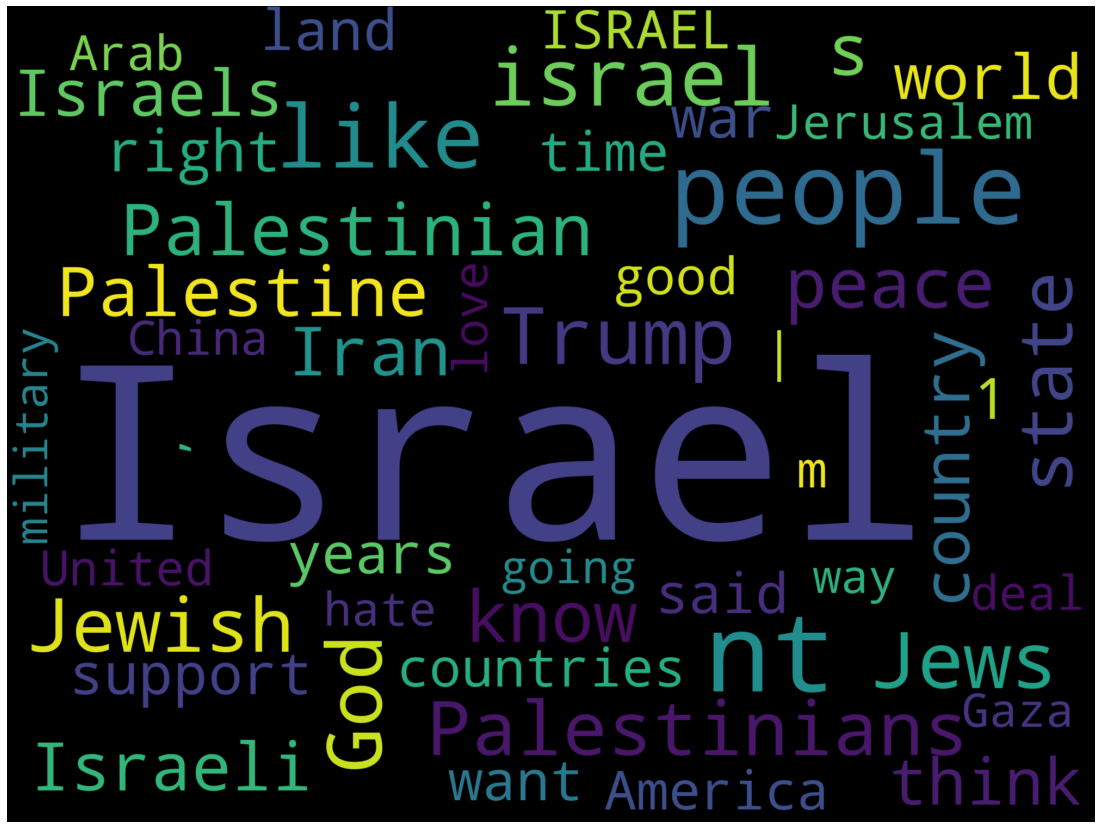


 There are 50 words in your word cloud. 
 There is a random sample of 6000 Tweets in your word cloud. 
 Your query(ies) include: Israel. 
 Your seed is 100.


In [4]:
word_cloud("Tweets.csv")

Is the CSV in your working directory? Type'Y' for YES or 'N' for NO. Y
Input the number words you want displayed in the word cloud? 25-100 is recommended. 50
Which queries do you want to include in your word cloud? Type 'J' for Jews, 'I' for Israel, 'Z' for Zionist, or a combination of these letters to produce a different query i.e. 'JI' for Jews/Israel, 'ZI' for Zionist/Israel, 'JZ' for Jews/Zionist, or 'JZI' to include all the queries in your word cloud. Z
You selected 'Zionist'.
Input a random seed number. 40 is recommended: 35
How many Tweets do you want to analyze? 2,000 is recommended.5000


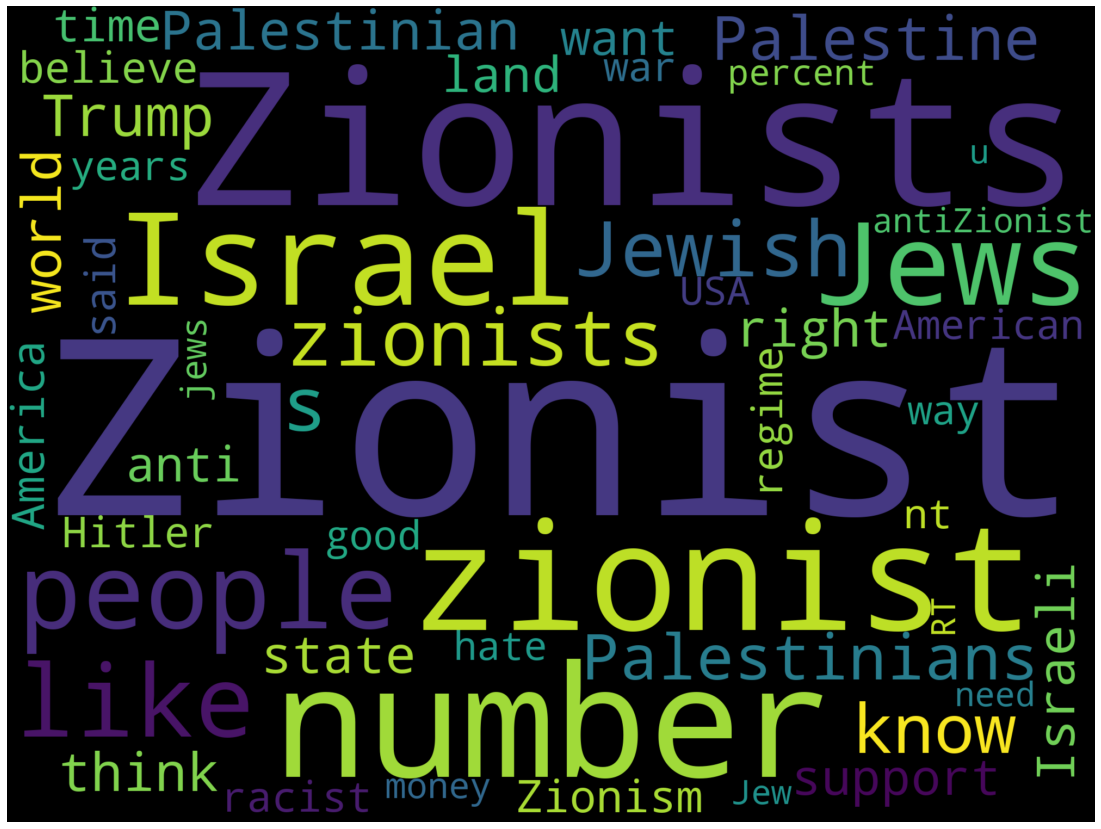


 There are 50 words in your word cloud. 
 There is a random sample of 5000 Tweets in your word cloud. 
 Your query(ies) include: Zionist. 
 Your seed is 35.


In [6]:
word_cloud("Ekphrasis_Tweets.csv")